Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "Sean(Cheng) Xu"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [1]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
# import quandl
# quandl.ApiConfig.api_key = "YOUR_API_KEY"

/Users/sean/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

# start = datetime.datetime(2013, 11, 12)
start = datetime.datetime(2015, 7, 6)
end = datetime.datetime(2020, 7, 7)

# amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


[*********************100%***********************]  1 of 1 completed


In [6]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-29,2690.010010,2696.800049,2630.080078,2680.379883,2680.379883,4223400
2020-06-30,2685.070068,2769.629883,2675.030029,2758.820068,2758.820068,3769700
2020-07-01,2757.989990,2895.000000,2754.000000,2878.699951,2878.699951,6363400
2020-07-02,2912.010010,2955.560059,2871.100098,2890.300049,2890.300049,6593400
2020-07-06,2934.969971,2988.110107,2930.000000,2984.139893,2984.139893,1410274


In [ ]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)
amzn.head()

In [3]:
import yfinance as yf
from pandas_datareader import data as pdr

# If we want to download multipe stocks into a single dataframe:
'''Using this method to download all stocks data same time'''

all_stocks_list = ['AMZN', 'FB', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start, end = end)

[*********************100%***********************]  4 of 4 completed


In [ ]:
## TYPE YOUE CODE BELOW

In [4]:
#Check if there is any null value

all_stocks.isnull().values.any()

False

In [5]:
all_stocks.head()

Adj Close                                          Close  \
                  AMZN         FB         IBM         MMM        AMZN   
Date                                                                    
2015-07-06  436.040009  87.550003  132.542847  134.639465  436.040009   
2015-07-07  436.720001  87.220001  132.760086  134.943329  436.720001   
2015-07-08  429.700012  85.650002  131.279572  132.581833  429.700012   
2015-07-09  434.390015  85.879997  131.834763  133.484787  434.390015   
2015-07-10  443.510010  87.949997  134.329025  134.526581  443.510010   

                                                     High             ...  \
                   FB         IBM         MMM        AMZN         FB  ...   
Date                                                                  ...   
2015-07-06  87.550003  164.729996  155.080002  439.730011  88.190002  ...   
2015-07-07  87.220001  165.000000  155.429993  437.730011  87.849998  ...   
2015-07-08  85.650002  163.160004  152.710007  435.989990  86.750000  ...   
2015-07-09  85.879997  163.850006  153.750000  438.720001  87.599998  ...   
2015-07-10  87.949997  166.949997  154.949997  444.720001  88.220001  ...   

                   Low                    Open                         \
                   IBM         MMM        AMZN         FB         IBM   
Date                                                                    
2015-07-06  163.520004  153.830002  435.230011  86.489998  163.830002   
2015-07-07  162.229996  153.160004  435.679993  87.800003  164.940002   
2015-07-08  162.679993  152.699997  434.350006  86.290001  164.000000   
2015-07-09  163.699997  153.750000  434.899994  86.730003  165.339996   
2015-07-10  165.520004  154.500000  440.489990  87.349998  165.660004   

                         Volume                              
                   MMM     AMZN        FB      IBM      MMM  
Date                                                         
2015-07-06  153.889999  1903200  24635900  3079800  2172200  
2015-07-07  155.139999  3454200  33059900  3549900  2865300  
2015-07-08  154.080002  2383100  24399300  2776300  2613300  
2015-07-09  154.589996  2271400  23307400  4199700  2069200  
2015-07-10  154.740005  2401000  23245900  4538300  2061300  

[5 rows x 24 columns]

In [6]:
'''Select Adj Close'''

all_stocks['Adj Close'].head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-07-06,436.040009,87.550003,132.542847,134.639465
2015-07-07,436.720001,87.220001,132.760086,134.943329
2015-07-08,429.700012,85.650002,131.279572,132.581833
2015-07-09,434.390015,85.879997,131.834763,133.484787
2015-07-10,443.510010,87.949997,134.329025,134.526581


In [7]:
'''Make sure the date at the tail is today'''

all_stocks['Adj Close'].tail()

,AMZN,FB,IBM,MMM
Date,,,,
2020-06-29,2680.379883,220.639999,119.750000,155.570007
2020-06-30,2758.820068,227.070007,120.769997,155.990005
2020-07-01,2878.699951,237.550003,118.540001,155.429993
2020-07-02,2890.300049,233.419998,119.699997,157.039993
2020-07-06,3057.040039,240.279999,120.190002,158.100006


In [8]:
'''Resample the data to get prices for the end of the business month'''

df = all_stocks['Adj Close']
df_month_end = df.resample('M').last()
df_month_end

,AMZN,FB,IBM,MMM
Date,,,,
2015-07-31,536.150024,94.010002,130.338211,131.392426
2015-08-31,512.890015,89.430000,119.981064,124.263855
2015-09-30,511.890015,89.900002,117.612122,123.940422
2015-10-31,625.900024,101.970001,113.644905,137.438583
2015-11-30,664.799988,104.239998,114.170456,137.787231
...,...,...,...,...
2020-03-31,1949.719971,166.800003,109.461983,135.169342
2020-04-30,2474.000000,204.710007,123.898369,150.427994
2020-05-31,2442.370117,225.089996,124.900002,156.440002


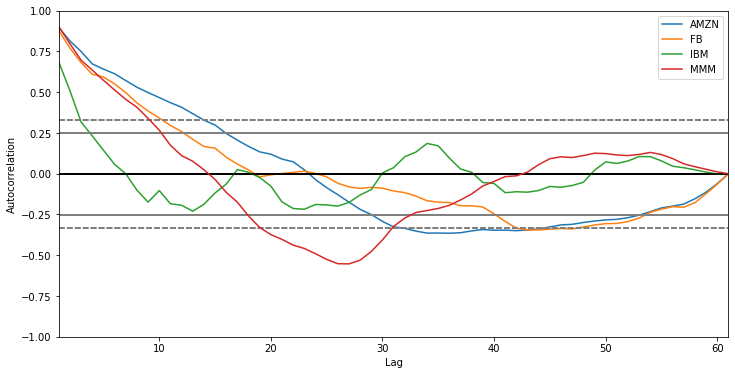

In [9]:
'''Use the pandas autocorrelation_plot() function to plot the autocorrelation 
of the adjusted month-end close prices for each of the stocks'''

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
for item in df_month_end.columns:
    pd.plotting.autocorrelation_plot(df_month_end[item], label = item)

plt.legend();


In [ ]:
'''Are they autocorrelated?
Provide short explanation.'''

'''From this autocorrelated plot which represents the autocorrelation between the stock price and time, I can tell, 
based on the range of 95% confidence interval, AMZN shows its significant 
autocorrelation from the start to the month of 18. Then for the rest of time it is just not autocorrelated. FB shows
autocorrelation from the start to the month of 14 approx. and not autocorrelated for the rest of time as well. IBM, its
stock only shows a significant autocorrelation before the first 3 month and then it is not autocorrelated to the end 
month. MMM shows autocorrelation before the month of 11 and between the 18th month and the 33rd month, and it is not 
autocorrelated for the rest of months.'''

In [10]:
'''Calculate the monthly returns for each stock'''

monthly_return = df_month_end / df_month_end.shift(1) - 1
monthly_return.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-07-31,NaN,NaN,NaN,NaN
2015-08-31,-0.043383,-0.048718,-0.079464,-0.054254
2015-09-30,-0.001950,0.005256,-0.019744,-0.002603
2015-10-31,0.222724,0.134260,-0.033731,0.108908
2015-11-30,0.062150,0.022261,0.004624,0.002537


In [11]:
'''Drop NaN values'''

monthly_return.dropna(inplace = True)
monthly_return.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-08-31,-0.043383,-0.048718,-0.079464,-0.054254
2015-09-30,-0.001950,0.005256,-0.019744,-0.002603
2015-10-31,0.222724,0.134260,-0.033731,0.108908
2015-11-30,0.062150,0.022261,0.004624,0.002537
2015-12-31,0.016682,0.004029,-0.012910,-0.037936


In [12]:
'''There are no NaN values'''

monthly_return.isnull().values.any()

False

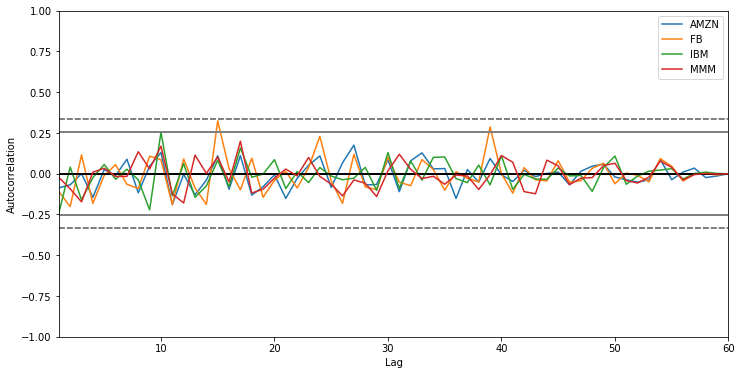

In [13]:
'''Use pandas autocorrelation_plot() to plot the autocorrelation of the monthly returns'''

plt.figure(figsize = (12, 6))

for item in monthly_return.columns:
    pd.plotting.autocorrelation_plot(monthly_return[item], label = item)

In [ ]:
'''From this autocorrelation plot I can tell the monthly returns of all stocks are NOT showing significant values of
autocorrelation since the autocorrelation values are within the range of 95% confidence interval which value is between
-0.25 and 0.25.'''

In [14]:
'''Combine all 4 time series (returns) into a single DataFrame'''

# This dataframe is a single dataframe that contains four stocks from the first time we downloaded it

monthly_return.head()

,AMZN,FB,IBM,MMM
Date,,,,
2015-08-31,-0.043383,-0.048718,-0.079464,-0.054254
2015-09-30,-0.001950,0.005256,-0.019744,-0.002603
2015-10-31,0.222724,0.134260,-0.033731,0.108908
2015-11-30,0.062150,0.022261,0.004624,0.002537
2015-12-31,0.016682,0.004029,-0.012910,-0.037936


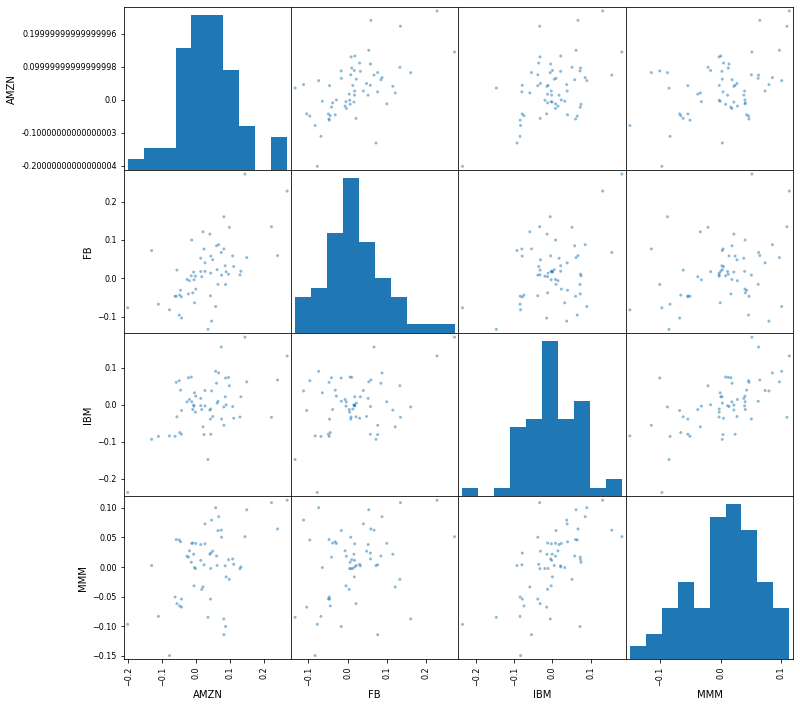

In [15]:
'''Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix'''

pd.plotting.scatter_matrix(monthly_return, figsize = (12, 12));

In [ ]:
'''From the scatter matrix plot above we can see most of these monthly returns of four stocks shows a correlation 
between each other but not obvious and some of them does not show any significant correlation too. But IBM and MMM, 
AMZN and FB shows its obvious positive correlation.'''